## Reinforcement Learning Programming - CSCN 8020 - Assignment 2


Jun He (8903073)     


![Taxi Environment](taxi.png)<br>
The environment has 6 discrete actions, 500 discrete states, and the following rewards:<br>
* -1 per step unless other reward is triggered.
* +20 delivering passenger.
* -10 executing “pickup” and “drop-off” actions illegally.<br>
Action space<br>
* 0: Move south (down)
* 1: Move north (up)
* 2: Move east (right)
* 3: Move west (left)
* 4: Pickup passenger
* 5: Drop off passenger

**Observation Space**<br>
There are 500 discrete states since there are 25 taxi positions, 5 possible locations of the passenger(including the case when the passenger is in the taxi), and 4 destination locations. Destination on the map are represented with the first letter of the color.<br>
Passenger locations:<br>
* 0: Red
* 1: Green
* 2: Yellow
* 3: Blue
* 4: In taxi<br>
Destinations:<br>
* 0: Red
* 1: Green
* 2: Yellow
* 3: Blue<br>
An observation is returned as an int() that encodes the corresponding state, calculated by ((taxi row ∗
5 + taxi col) ∗ 5 + passenger location) ∗ 4 + destination

## Q-Learning 
### Problem Statement
Implement the Q-Learning algorithm on the Taxi environment from OpenAI Gym. Train an agent to efficiently navigate and pick up passengers. Use the following hyperparameters:<br>
* Learning Rate α: 0.1
* Exploration Factor ε: 0.1
* Discount Factor γ: 0.9

### Tasks
 Implement the Q-Learning algorithm and train an agent on the Taxi environment.
* Report the following metrics after training:
1. Total episodes
2. Total steps taken per episode
3. Average return per episode
* Make a deliberate change to the following parameters (separately) and use each value once.
– Learning Rate α = [0.01, 0.001, 0.2]
– Exploration Factor γ = [0.2, 0.3]

### Preparation
**Q-Learning** features: value-based, optimal policy, model free.
learning by Q-value find optimal policy.<br>
![Bellman Equation](equation.png)<br>
QLearning and Deep Q-Learning: Q-Learning is well-suited for problems with discrete state and action spaces,DQN are typically used to extend the capabilities of Q-Learning, the state or action space is continuous.



In [2]:
## --------------------------import packages
import numpy as np
import gym
import random
import time
from assignment2_utils import describe_env, simulate_episodes

In [ ]:
# ------------------Initial------------------------
# Initialize the Taxi environment
env = gym.make("Taxi-v3")
n_states, n_actions = describe_env(env)  #-----------------------todo 1 enviroment

# Q-learning parameters
learning_rates = [0.01, 0.001, 0.1, 0.2]
  # Alpha (Step size)
discount_factor = 0.9  # Gamma (Future reward discount)
exploration_rates = [0.1, 0.2, 0.3]  # Epsilon (Exploration-exploitation tradeoff)
n_episodes = 5000  # Number of episodes
max_steps_per_episode = 100  # Maximum steps allowed per episode

# Tracking metrics
total_steps = []
total_rewards = []


Observation space:  Discrete(500)
Observation space size:  500
Reward Range:  (-inf, inf)
Number of actions:  6
Action description:  {0: 'Move south (down)', 1: 'Move north (up)', 2: 'Move east (right)', 3: 'Move west (left)', 4: 'Pickup passenger', 5: 'Drop off passenger'}


In [ ]:

# Train the agent using Q-learning
def train_agent(env, n_states, n_actions, learning_rate, exploration_rate):
    # Initialize Q-table
    table_shape = (n_states, n_actions)
    Q_table = np.zeros(table_shape)  # Q-table initialized to zero
    for episode in range(n_episodes):
        state, _ = env.reset()        #------------------todo 2  No state needed in MAB
        done = False
        total_reward = 0
        steps = 0

        for _ in range(max_steps_per_episode):
            ##------------Selects random action (explore) or best Q-table action (exploit)---------------------
            # Choose an action: explore or exploit  ---------------todo 5 random.random()<epsilon
            if random.uniform(0, 1) < exploration_rate:  
                action = env.action_space.sample()  # Explore
            else:
                action = np.argmax(Q_table[state, :])  # Exploit best known action

            # Take action and observe the next state and reward
            next_state, reward, done, _, _ = env.step(action) #------- ----todo 3 pull(action)
            
            # Q-value update using Bellman equation  ---------------------------------todo 4 estimates[action]  and algorithm Epsilon-Greedy, UCB, Thompson Sampling
            Q_table[state, action] = Q_table[state, action] + learning_rate * (
                reward + discount_factor * np.max(Q_table[next_state, :]) - Q_table[state, action]
            )
            # reset state and accumulate reward
            total_reward += reward
            state = next_state
            steps += 1

            # Ends when passenger is dropped off or max steps reached.
            if done:
                break
        
        # set steps and reward of each episode to array
        total_steps.append(steps)
        total_rewards.append(total_reward)

        # Print progress every 1000 episodes
        if episode % 1000 == 0:
            print(f"Episode {episode}/{n_episodes} completed.")

    # Save the trained Q-table
    np.save("q_table.npy", Q_table)  #---------------todo 6 No Q-table, direct reward tracking
    print("Training completed!")

    # Report training metrics

    avg_rewards = np.mean(total_rewards)
    steps_sum = np.sum(total_steps)
    print(f"Total episodes: {n_episodes}")
    print(f"Total steps per episode: {steps_sum:.2f}")
    print(f"Average return per episode: {avg_rewards:.2f}")

    return Q_table, steps_sum,  avg_rewards



In [5]:
# Experiment with different hyperparameters
def experiment_hyperparameters(env, n_states, n_actions):
    results = {}

    for learning_rate in learning_rates:
        for exploration_rate in exploration_rates:
            print(f"Training with alpha={learning_rate}, epsilon={exploration_rate} currently")
            Q_table, steps_sum, avg_rewards = train_agent(env, n_states, n_actions, learning_rate, exploration_rate)
            results[(learning_rate, exploration_rate)] = {"Q_table": Q_table, "steps_sum": steps_sum, "avg_rewards": avg_rewards}
    return results

### Ploting some results or analysis

In [6]:
import matplotlib.pyplot as plt

In [7]:
def plot_results(results):
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    for key, value in results.items():
        axs[0].scatter(str(key), value["steps_sum"], label=f"Alpha={key[0]}, Epsilon={key[1]}")
    axs[0].set_title("Total Steps per Episode")
    axs[0].set_xlabel("Hyperparameters (Alpha, Epsilon)")
    axs[0].set_ylabel("Steps")
    axs[0].legend()

    for key, value in results.items():
        axs[1].scatter(str(key), value["avg_rewards"], label=f"Alpha={key[0]}, Epsilon={key[1]}")
    axs[1].set_title("Average Reward per Episode")
    axs[1].set_xlabel("Hyperparameters (Alpha, Epsilon)")
    axs[1].set_ylabel("Rewards")
    axs[1].legend()

    plt.show()

### Find best performing hyperparameters

In [8]:
# Find best performing hyperparameters --------max reward
def get_best_hyperparameters(results):
    return max(results, key=lambda x: results[x]["avg_rewards"])

In [9]:

# Define an agent class for action selection
class Agent:
    def __init__(self, q_table):
        self.q_table = q_table
    
    def select_action(self, state):
        return np.argmax(self.q_table[state, :])

### Main port：run training - get results - plot - evaluation - get best result

Training with alpha=0.01, epsilon=0.1 currently
Episode 0/5000 completed.


e:\AI-venvs\venv\Helena_AI_Venv\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Episode 1000/5000 completed.
Episode 2000/5000 completed.
Episode 3000/5000 completed.
Episode 4000/5000 completed.
Training completed!
Total episodes: 5000
Total steps per episode: 449821.00
Average return per episode: -120.65
Training with alpha=0.01, epsilon=0.2 currently
Episode 0/5000 completed.
Episode 1000/5000 completed.
Episode 2000/5000 completed.
Episode 3000/5000 completed.
Episode 4000/5000 completed.
Training completed!
Total episodes: 5000
Total steps per episode: 902522.00
Average return per episode: -130.48
Training with alpha=0.01, epsilon=0.3 currently
Episode 0/5000 completed.
Episode 1000/5000 completed.
Episode 2000/5000 completed.
Episode 3000/5000 completed.
Episode 4000/5000 completed.
Training completed!
Total episodes: 5000
Total steps per episode: 1359635.00
Average return per episode: -143.06
Training with alpha=0.001, epsilon=0.1 currently
Episode 0/5000 completed.
Episode 1000/5000 completed.
Episode 2000/5000 completed.
Episode 3000/5000 completed.
Episo

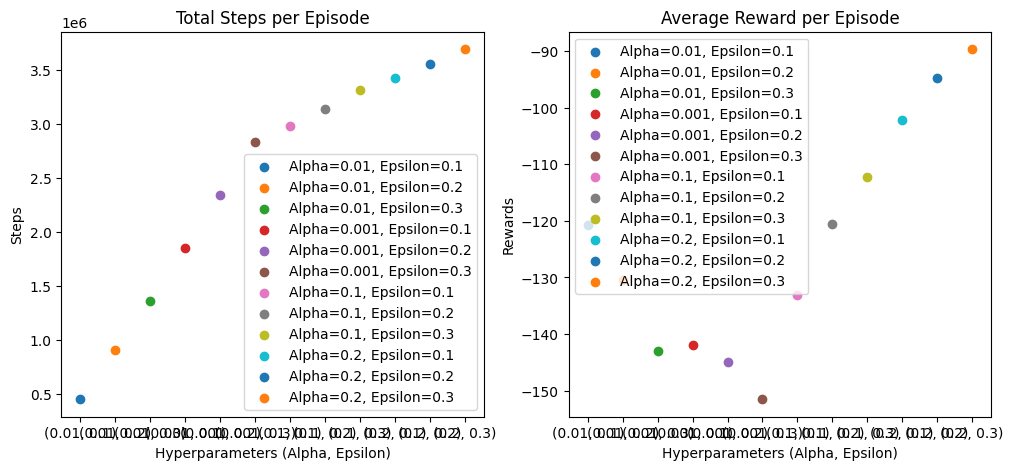

Best hyperparameters: Alpha=0.2, Epsilon=0.3
Passenger is at: Green, wants to go to Red. Taxi currently at (20.0, 0.0)


e:\AI-venvs\venv\Helena_AI_Venv\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Passenger is at: Green, wants to go to Red. Taxi currently at (10.0, 1.0)
Passenger is at: Yellow, wants to go to Red. Taxi currently at (20.0, 3.0)


: 

In [ ]:
# Run the full training and evaluation pipeline
def main():
    results = experiment_hyperparameters(env, n_states, n_actions)
    plot_results(results)
    best_hyperparams = get_best_hyperparameters(results)
    print(f"Best hyperparameters: Alpha={best_hyperparams[0]}, Epsilon={best_hyperparams[1]}")
    Q_table = results[best_hyperparams]["Q_table"]
    agent = Agent(Q_table)
    env2 = gym.make("Taxi-v3", render_mode="human")
    simulate_episodes(env2, agent)

if __name__ == "__main__":
    main()